# Laboratorio de Introducción al Procesamiento de Lenguaje Natural (2024)



---


En este laboratorio vamos abordar un problema de clasificación de dos clases, con el objetivo de poner en práctica algunos de los conceptos vistos en el curso, como los *clasificadores estadísticos*, el uso de *embeddings* para representar la semántica de textos y los *LLMs* con zero-shot y few-shot.

Los ejercicios que tienen que resolver están señalizados por números del 1️⃣al 5️⃣, y las soluciones a ellos deberán entregarlas en un notebook como este. Los resultados y conclusiones que surjan de esos ejercicios las van a comunicar en un informe (con un **máximo de 3 páginas**). En la sección "¿Qué se espera del informe?" de la letra del laboratorio van a encontrar una guía para escribirlo.


---

⚠️ Antes de empezar a trabajar, háganse una copia de este *notebook*.

⚠️⚠️ Cuando entreguen el notebook con su solución, no olviden incluir el nombre y apellido de tod@s l@s integrantes del grupo.

---

## Carga de datos

Los datos que vamos a usar en este laboratorio fueron usados en una [competencia](https://www.fing.edu.uy/inco/grupos/pln/ta1c/) internacional que tuvo lugar entre marzo y junio de 2025. El objetivo de la competencia, llamada TA1C (Te Ahorré Un Click), era impulsar el desarrollo de sistemas de PLN que pudieran detectar y arruinar clickbait. En este laboratorio nos vamos a centrar únicamente en detectar cuándo un titular de una noticia es clickbait o no, lo que se corresponde con un problema de clasificación binaria (de dos clases).

El origen de estos datos está en la [tesis de maestría](https://hdl.handle.net/20.500.12008/48614) de Gabriel Mordecki, que también fueron detallados en su respectiva publicación "[Te Ahorré Un Click: A Revised Definition of Clickbait and Detection in Spanish News](https://link.springer.com/chapter/10.1007/978-3-031-80366-6_32)".

En esta primera sección del *notebook* cargaremos los datos en cuatro listas:
1. `train_headlines` va a contener todos los titulares de noticias del conjunto de *train*.
2. `train_clickbait` va a contener las anotaciones del conjunto de *train*, indicando si el correspondiente titular es clickbait o no (`train_clickbait[i]` es la anotación del titular `train_headlines[i]`).
3. `dev_headlines` que va a contener lo análogo a `train_headlines` pero esta vez siendo del conjunto de desarrollo (*dev*).
4. `dev_clickbait` que va a contener lo análogo a `train_clickbait` pero esta vez siendo del conjunto de desarrollo (*dev*).

Este código se lo damos ya implementado para que todos los grupos puedan partir desde el mismo punto común.

In [ ]:
%%capture
import csv

!wget https://raw.githubusercontent.com/pln-fing-udelar/pln-inco-resources/refs/heads/master/clickbait/iberlef2025/detection/TA1C_dataset_detection_train.csv
!wget https://raw.githubusercontent.com/pln-fing-udelar/pln-inco-resources/refs/heads/master/clickbait/iberlef2025/detection/TA1C_dataset_detection_dev_gold.csv

with open("TA1C_dataset_detection_train.csv","r") as f:
    train = [x for x in csv.reader(f)]

with open("TA1C_dataset_detection_dev_gold.csv","r") as f:
    dev = [x for x in csv.reader(f)]

train_headlines = [x[4] for x in train[1:]]
train_clickbait = [x[5] for x in train[1:]]

dev_headlines = [x[4] for x in dev[1:]]
dev_clickbait = [x[6] for x in dev[1:]]

Si los datos quedaron correctamente cargados, la siguiente celda debería poder imprimir el titular del índice `24` en el conjunto de *train* y el de índice `39` en el conjunto de *dev*.

PD: Los índices elegidos podrían ser otros; el objetivo es simplemente probar si las 4 listas (`train_headlines`, `train_clickbait`, `dev_headlines` y `dev_clickbait`) quedaron correctamente cargadas.

In [ ]:
index_train = 24
print(f'El titular en la posición {index_train} en TRAIN es "{train_headlines[index_train]}"\n¿Clickbait? --> {train_clickbait[index_train]}\n\n')

index_dev = 39
print(f'El titular en la posición {index_dev} en DEV es "{dev_headlines[index_dev]}"\n¿Clickbait? --> {dev_clickbait[index_dev]}')

El titular en la posición 24 en TRAIN es "Sin TACC: todo lo que necesitas saber sobre las comidas para celíacos"
¿Clickbait? --> Clickbait


El titular en la posición 39 en DEV es "El consumo de sidra creció y ahora se consume durante todo el año"
¿Clickbait? --> No


Ya teniendo cargados los datos que van a usar, a partir de ahora comenzarán a hacer diferentes experimentos que van a tener que ser reportados en el informe a entregar.

---

## 1️⃣Clasificación con modelos estadísticos sin usar embeddings como entrada

En este primer ejercicio van a entrenar modelos estadísticos que representen la entrada con *bag of words* y *tf-idf*, pero sin usar *embeddings*.

Para eso, y a modo de guía, les dejamos ya implementado en la siguiente celda el entrenamiento de un modelo sencillo y su posterior evaluación sobre el conjunto de desarrollo (*dev*), reportando la medida F1, pero también las de *precision* y *recall* para brindar contexto. En el ejemplo usamos [bag of words](https://scikit-learn.org/stable/modules/feature_extraction.html#the-bag-of-words-representation) para representar numéricamente los textos y [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html) como algoritmo de clasificación.

Luego de ejecutar y entender cómo funciona el código que les damos, exploren las posibilidades que hay usando:
- [bag of words](https://scikit-learn.org/stable/modules/feature_extraction.html#the-bag-of-words-representation) para representar los textos
- [TF-IDF](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) para representar los textos
- cualquier algoritmo de clasificación disponible en [sklearn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

💡 Además, también pueden probar preprocesando los textos usando diferentes pipelines. Eso sí, tengan en cuenta que si usan un pipeline de preprocesamiento para procesar los textos al entrenar, también tendrán que usarlo para transformar los textos al predecir nuevas instancias (por ejemplo del conjunto de desarrollo). Esta aclaración vale para **todos los ejercicios de esta tarea de laboratorio**.

---

⚠️ Recuerden siempre evaluar sus enfoques sobre el conjunto de desarrollo (*dev*) usando la métrica F1 (macro) tal como se muestra en el ejemplo que les damos en la siguiente celda. Es decir, para cada modelo entrenado, deberán predecir las etiquetas de cada instancia de `dev_headlines` y calcular el F1 con respecto a `dev_clickbait`, que contiene los resultados esperados.

---

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, classification_report
from sklearn.svm import SVC


bow_vectorizer = CountVectorizer(ngram_range=(1,3), strip_accents= 'unicode') # Prueben acá con varias formas de vectorizar. En este caso se usa bag of words de 1-gramas, 2-gramas y 3-gramas
clf = SVC() # Prueben acá con varios modelos

training_features = bow_vectorizer.fit_transform(train_headlines) # Se vectorizan los textos de train
clf.fit(training_features, train_clickbait) # Se entrena el clasificador usando los textos vectorizados

dev_features = bow_vectorizer.transform(dev_headlines) # Se vectorizan los textos de dev
prediction = clf.predict(dev_features) # Se predice si cada texto (ya vectorizado en la línea anterior) es o no clickbait

print(f"F1-Score macro: {str(round(f1_score(dev_clickbait, prediction, average='macro')*100, 2))}\n")  # Se calcula el F1 y se pasa a escala de 100 para mayor legibilidad.
print(classification_report(dev_clickbait, prediction)) # Se imprime un reporte de clasificación ya implementado en sklearn que, entre otras cosas, contiene al valor de F1 impreso en la línea anterior

F1-Score macro: 62.01

              precision    recall  f1-score   support

   Clickbait       0.69      0.28      0.39       203
          No       0.76      0.95      0.85       497

    accuracy                           0.75       700
   macro avg       0.73      0.61      0.62       700
weighted avg       0.74      0.75      0.71       700



##2️⃣Clasificación con modelos estadísticos usando embeddings como entrada

Ahora la idea es que entrenen modelos de manera análoga a lo que hicieron en el ejercicio anterior, pero usando *embeddings* como entrada (en vez de representaciones de *bag of words* o *tf-idf*).

En este caso, les dejamos en la siguiente celda una implementación de un clasificador [k-NN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) que usa el modelo [e5](https://huggingface.co/intfloat/multilingual-e5-large) de *sentence transformers* para representar numéricamente los textos de entrada.

Luego de ejecutar y entender cómo funciona el código que les damos, exploren las posibilidades que hay usando:
- cualquier algoritmo de clasificación disponible en [sklearn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)
- otras formas de representar la entrada con embeddings. Pueden ser con algoritmos word2vec, métodos basados en BERT, otros de *sentence transformers* o cualquier otro método similar. Pueden revisar las etiquetas de [HuggingFace](https://huggingface.co/) relacionadas a esto, como por ejemplo la de [sentence-transformers](https://huggingface.co/models?library=sentence-transformers), y quizás también les sirva revisar qué herramientas dispone [Spacy](https://spacy.io/models/es#es_core_news_lg) para el español.

---

⚠️ **IMPORTANTÍSIMO**: a partir de este momento van a necesitar tener activado un entorno con GPU en Google Colab. Para eso tienen que ir arriba a la derecha de la interfaz (donde está la indicación de uso de RAM y disco), hacer click en la flechita, y seleccionar la opción "Cambiar tipo de entorno de ejecución". En la ventana que se abre tienen que tener elegida alguna de las GPU, típicamente la que dice "GPU T4"

---

In [ ]:
%%capture
from sentence_transformers import SentenceTransformer
from sklearn.neighbors import KNeighborsClassifier

embeddings_model = SentenceTransformer("intfloat/multilingual-e5-large") # Se carga el modelo de embeddings e5

In [ ]:
train_headlines_emb = embeddings_model.encode(train_headlines) # Se representan los titulares del conjunto de train como embeddings
dev_headlines_emb = embeddings_model.encode(dev_headlines) # Se representan los titulares del conjunto de dev como embeddings

clf_knn = KNeighborsClassifier(n_neighbors=2) # Se instancia el clasificador k-NN con 2 vecinos. Pueden variar la cantidad de vecinos si prefieren, y también probar todos los modelos de clasificación que quieran.
clf_knn.fit(train_headlines_emb, train_clickbait) # Se ajusta el modelo para tomar como entrada los titulares de train y como salida los valores de clickbait de train.

predictions_knn = clf_knn.predict(dev_headlines_emb) # Una vez ajustado en los valores de train, se predicen nuevas instancias del conjunto de dev.

print(f"F1-Score macro: {str(round(f1_score(dev_clickbait, predictions_knn, average='macro')*100, 2))}\n") # Se calcula F1.
print(classification_report(dev_clickbait, predictions_knn)) # Se hace el reporte de clasificación de sklearn.


F1-Score macro: 68.6

              precision    recall  f1-score   support

   Clickbait       0.51      0.71      0.59       203
          No       0.86      0.71      0.78       497

    accuracy                           0.71       700
   macro avg       0.68      0.71      0.69       700
weighted avg       0.76      0.71      0.73       700



##3️⃣Clasificación con LLMs usando zero-shot

Los modelos que entrenaron anteriormente usaban algoritmos de clasificación estadísticos.  En este tercer ejercicio buscamos que puedan usar grandes modelos de lenguaje (LLM) para la clasificación usando la técnica de zero-shot. Es decir, dándole instrucciones al modelo para cumplir la tarea pero sin darle ejemplos.

En las siguientes celdas les dejamos implementado un ejemplo sencillo que carga el modelo [Qwen3 instruct de 4B](https://huggingface.co/Qwen/Qwen3-4B-Instruct-2507) y lo llama para clasificar el ejemplo de *dev* de índice 39.

Luego de ejecutar y entender cómo funciona el código que les damos, exploren las posibilidades que hay variando:
- la prompt zero-shot usada
- el LLM usado, que pueden encontrar muchos más en la etiqueta [*text-generation* de Hugging Face](https://huggingface.co/models?pipeline_tag=text-generation&sort=trending).

Recuerden que el ejemplo solamente clasifica un texto de *dev*, pero ustedes van a tener que hacerlo para **todo** el conjunto de *dev*.

💡 La letra del ejercicio la redactamos para que usen LLMs abiertos de uso local en el ambiente de Google Colab. Sin embargo, si quieren, también pueden probar con modelos más grandes usados via API. Los LLMs Gemini de Google son una buena opción porque cuentan con uso gratis bajo ciertos límites; el instructivo sobre cómo incorporar llamadas a Gemini desde su código está en [Google AI Studio](https://ai.google.dev/gemini-api/docs/quickstart?hl=es-419). Por supuesto, son libres de explorar cualquier otro servicio similar que ofrezca acceso a LLMs por medio de APIs.

---

⚠️ El límite de uso de GPU que dispone el plan gratuito de Google Colab es muy limitado. Eso puede hacer que, si eligen modelos muy grandes, el límite pueda saturarse rápidamente o ni siquiera alcanzar para cargar el modelo. Por eso es que el ejemplo que le entregamos usa un modelo de 4B que sí puede correrse con este entorno.

⚠️⚠️ Como cuerpo docente somos totalmente conscientes de las dificultades de acceso a LLMs estados del arte: o requieren de hardware muy caro o de servicios muy costosos. Por lo tanto, **en ningún caso el desempeño de estos LLMs va a ser parte de la evaluación del laboratorio**. Nuestro objetivo es que experimenten con LLMs, más allá de los valores de F1 que puedan alcanzar con ellos.

---



In [ ]:
%%capture
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "Qwen/Qwen3-4B-Instruct-2507" # Este es el nombre del modelo a cargar


tokenizer = AutoTokenizer.from_pretrained(model_name) # Se carga el tokenizador asociado al modelo elegido
model = AutoModelForCausalLM.from_pretrained(model_name, dtype="auto", device_map="auto") # Se carga el modelo desde hugging face

In [ ]:
index_dev = 39
text = dev_headlines[index_dev] # CUIDADO: en este ejemplo solamente se accede a un (1) texto. En sus soluciones tienen que predecir TODO el conjunto de dev.

prompt = f'Indicá si este titular es clickbait o no: "{text}". Solamente respondé "Clickbait" o "No".'

messages = [{"role": "user", "content": prompt}] # Esto tiene que ver con el formato final de prompt que le va a entrar al modelo, con el cual fue ajustado.
text = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True) # Esto también tiene que ver con el formato final de prompt que le va a entrar al modelo.
model_inputs = tokenizer([text], return_tensors="pt").to(model.device) # Se tokeniza la entrada

generated_ids = model.generate(**model_inputs, max_new_tokens=16384) # El modelo genera de acuerdo a la entrada ya tokenizada
output_ids = generated_ids[0][len(model_inputs.input_ids[0]):].tolist() # Se guarda solamente lo que se necesita de la salida del modelo
content = tokenizer.decode(output_ids, skip_special_tokens=True) # Se recupera en texto lo generado por el modelo

print("Etiqueta asignada por el LLM:", content)
print("Etiqueta esperada:", dev_clickbait[index_dev])

Etiqueta asignada por el LLM: No
Etiqueta esperada: No


##4️⃣Clasificación con LLMs usando few-shot

Los LLMs pueden mejorar su funcionamiento si se les presenta uno o más ejemplos dentro de la prompt. Esto puede hacerse de manera manual (o aleatoria), eligiendo textos del conjunto de *train* para incluir en la prompt, o de manera automática, usando algún método que recupere el/los textos de *train* más parecido/s al que está pendiente de clasificar y los incluya en la prompt. En este ejercicio van a probar ambos enfoques.

### Few-shot con ejemplos elegidos de manera manual o aleatoria

Primero prueben de hacer experimentos donde eligen `m` ejemplos (manual o aleatoriamente) del conjunto de train e incluirlos en la prompt. Como parte de estos experimentos pueden probar:
- variar la redacción de la prompt
- variar la cantidad `m`de ejemplos
- probar varios LLMs manteniendo la misma prompt y ejemplos `m`, de modo de poder hacer una comparación robusta entre los diferentes modelos.


💡 ¿Cómo le explicarían a alguien qué es el clickbait? Quizás eso sea importante para escribir la/s prompt/s... 👀 Seguramente haya definiciones de clickbait... ¿describirán bien el fenómeno? 👀


In [ ]:
#completar

### Few-shot con ejemplos elegidos de manera automática

Ahora prueben de hacer experimentos similares pero esta vez usando k-NN para elegir los `m` textos del conjunto de train que sean cercanos al que hay que clasificar, para incluirlos como ejemplos en la *prompt*. Esto apunta a mejorar el parecido de los ejemplos incluidos en la prompt con la instancia a clasificar.

💡 Como parte de estos experimentos pueden probar variar el parámetro `k` de k-NN.

💡💡 En lo posible, sería interesante que intenten fijar la/s prompt/s, la cantidad `m` de ejemplos incluidos en la/s prompt/s, y los LLMs usados, de forma que se pueda comparar entre el uso de zero-shot (ejercicio 3️⃣), el de few-shot con ejemplos seleccionados de manera manual/aleatoria (primera parte del ejercicio 4️⃣), y el de few-shot con ejemplos seleccionados para cada instancia (esta parte). En la investigación en Inteligencia Artificial esto es algo muy común, ya que permite determinar la contribución de un componente al cambio positivo/negativo en el desempeño de un sistema; en particular, cuando se trata de quitar un componente, se conoce como [ablación](https://en.wikipedia.org/wiki/Ablation_(artificial_intelligence)).


---

⚠️ La recuperación de los `m` ejemplos más cercanos debe hacerse para cada instancia a clasificar. Es decir, que este proceso se repetirá tantas veces como elementos halla en el conjunto de dev desarrollo (*dev*).

---

In [ ]:
#completar

##5️⃣Evaluación sobre el conjunto de *test*

Luego de haber delineado varios experimentos, entrenado y evaluado los respectivos modelos sobre el conjunto de desarrollo (*dev*), la parte final de la tarea de laboratorio consiste en evaluar **al menos** uno de cada ejercicio (1️⃣, 2️⃣, 3️⃣ y 4️⃣) sobre el conjunto de evaluación (*test*). La siguiente celda carga el conjunto de *test* y lo guarda en los conjuntos `test_headlines` y `test_clickbait`.

---

⚠️ **Esta es la parte final del laboratorio. A partir de este momento ya no podrán modificar ningún modelo**: si los modelos son ajustados a partir de las observaciones recogidas al evaluarlos sobre *test* se corre el peligro de que el modeo quede [sobreajustado](https://en.wikipedia.org/wiki/Overfitting) a este nuevo conjunto.

---


In [ ]:
%%capture
!wget https://raw.githubusercontent.com/pln-fing-udelar/pln-inco-resources/refs/heads/master/clickbait/iberlef2025/detection/TA1C_dataset_detection_test_gold.csv

with open("TA1C_dataset_detection_test_gold.csv","r") as f:
  test = [x for x in csv.reader(f)]
test_headlines = [x[4] for x in test[1:]]
test_clickbait = [x[5] for x in test[1:]]


A continuación, evalúen cada modelo elegido hallando la medida F1 de los modelos al predecir si los titulares de `test_headlines` son clickbait o no, y comparando los resultados obtenidos con los esperados (guardados en `test_clickbait`).

In [ ]:
#completar

---

¡Y eso es todo! Cualquier pregunta que tengan no duden en consultarla en el foro de EVA.

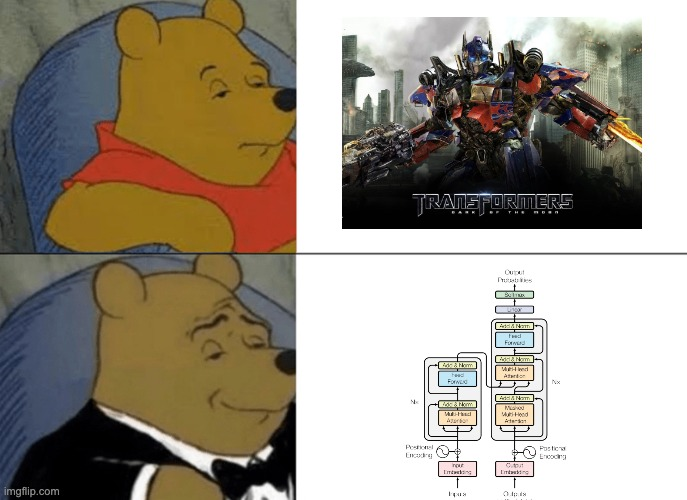